#**The Sparks Foundation** 



---
Name : Anna Elizabeth Thambi

##**Data Science and Business Analytics**
**TASK 3 - Exploratory Data Analysis - Retail**

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you van derive by exploring the data ?



---



##**Importing required libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

##**Loading the Dataset**

In [45]:
df=pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##**Getting information about data**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [47]:
df.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [48]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**From above, we get to know that we have 5 numberic and 8 categorical columns.**

##**Removing Duplicate Values**

In [49]:
df.shape

(9994, 13)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.shape

(9977, 13)

**Hence,17 duplicate row are removed**

###**From the given dataset,I conclude that coloumns such as Country , postal code and ship mode can be neglected.Thus removing those coloums**

In [52]:
df.drop(["Ship Mode","Country","Postal Code"],axis=1,inplace=True)

In [53]:
df.shape

(9977, 10)

In [54]:
#Again checking for duplicate values
df.isnull().sum()

Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##**Data Analysis : Visualizing the Data**

###**Univariate Analysis** 

In [55]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

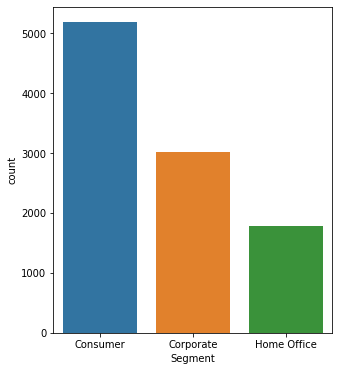

In [56]:
plt.figure(figsize=(5,6))
sb.countplot(x="Segment",data=df)
plt.show()

In [57]:
df["City"].value_counts()

New York City     914
Los Angeles       746
Philadelphia      536
San Francisco     506
Seattle           424
                 ... 
Norfolk             1
Romeoville          1
Portage             1
Jefferson City      1
Port Orange         1
Name: City, Length: 531, dtype: int64

In [58]:
df["State"].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

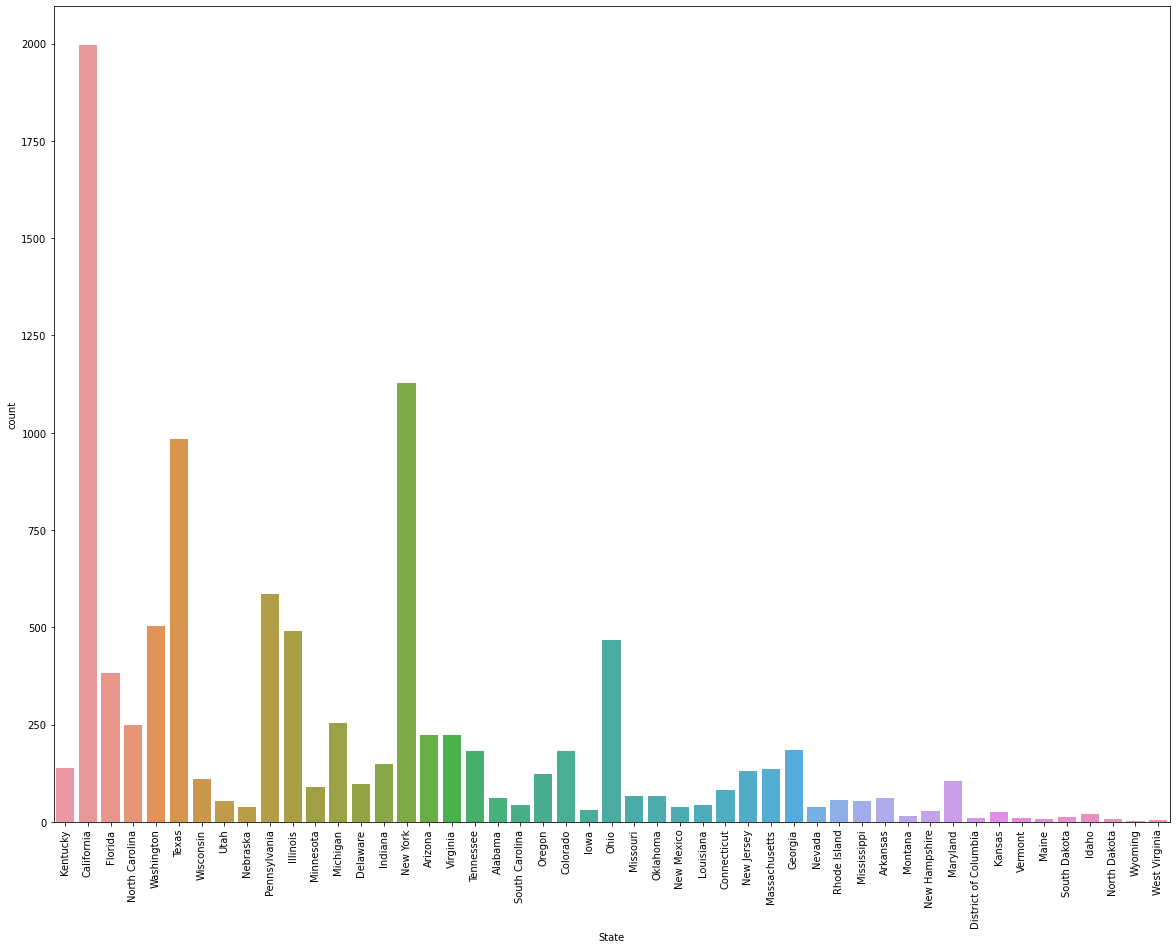

In [59]:
plt.figure(figsize=(20,15))
sb.countplot(x='State',data=df)
plt.xticks(rotation=90)
plt.show()

**With the help of visualization,we can clearly see the variation.Some of the states like California,Texas,New York are performing very well in business where as the countries like Wyoming and West Virginia are least performing countries.**

In [60]:
df["Region"].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

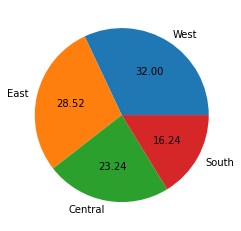

In [61]:
# Region west is giving us more sale
plt.pie(x=df["Region"].value_counts(),labels=["West","East","Central","South"],autopct="%.2f")
plt.show()

In [62]:
df["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

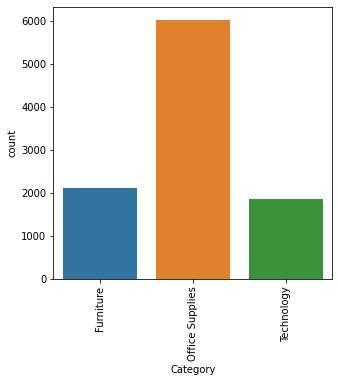

In [63]:
plt.figure(figsize=(5,5))
sb.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

**From all the supplies,we can see that the office supplies are the most**

In [64]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

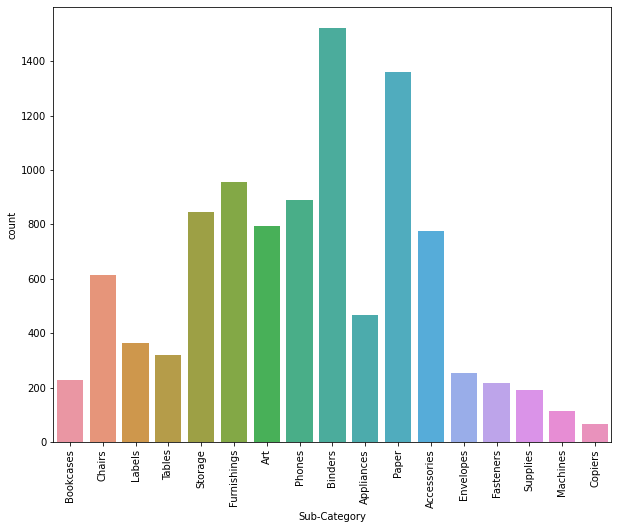

In [65]:
plt.figure(figsize=(10,8))
sb.countplot(x="Sub-Category",data=df)
plt.xticks(rotation=90)
plt.show()

In [66]:
df["Sales"].value_counts()

12.960     55
19.440     37
15.552     37
10.368     35
25.920     34
           ..
14.720      1
376.866     1
572.800     1
3.928       1
629.640     1
Name: Sales, Length: 5825, dtype: int64

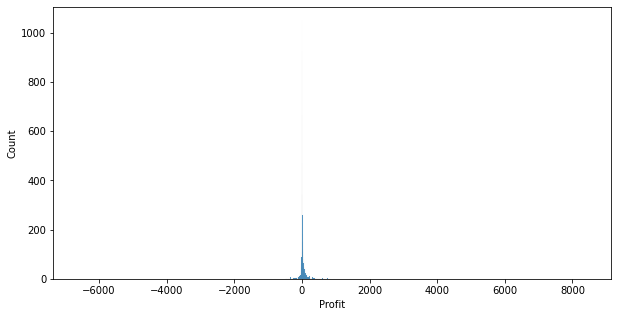

In [67]:
plt.figure(figsize=(10,5))
sb.histplot(df["Profit"])
plt.show()

###**Bivariate Analysis**
- against profit column with the rest of the columns

####**Comparision of profit regionwise**

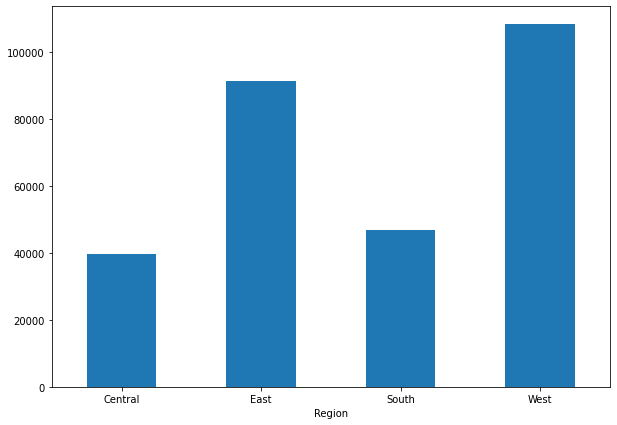

In [68]:
plt.figure(figsize=(10,7))
data_group=df.groupby(["Region"])["Profit"].sum()
data_group.sort_values(ascending=False)
data_group.plot.bar()
plt.xticks(rotation=360)
plt.show()

####**Comparision of profit citywise**

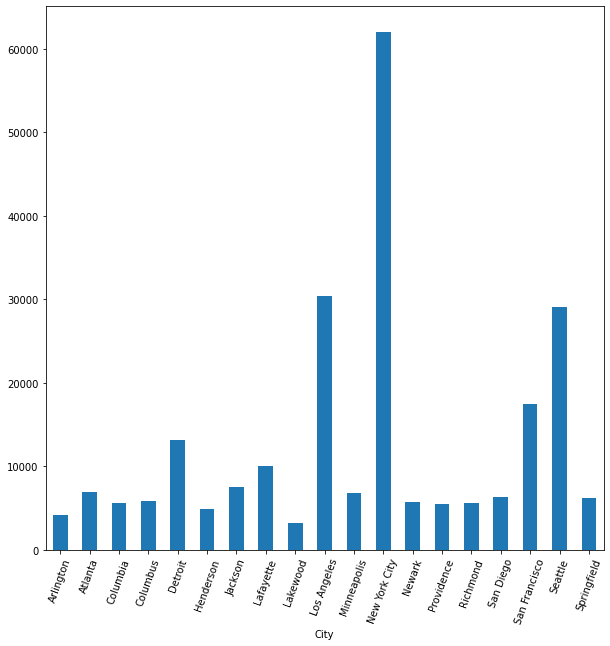

In [69]:
plt.figure(figsize=(10,10))
city_profit=df.groupby(["City"])["Profit"].sum()
a=city_profit[city_profit>3000]
a.sort_values(ascending=False)
a.plot.bar()
plt.xticks(rotation=70)
plt.show()

####**Comparision of profit statewise**

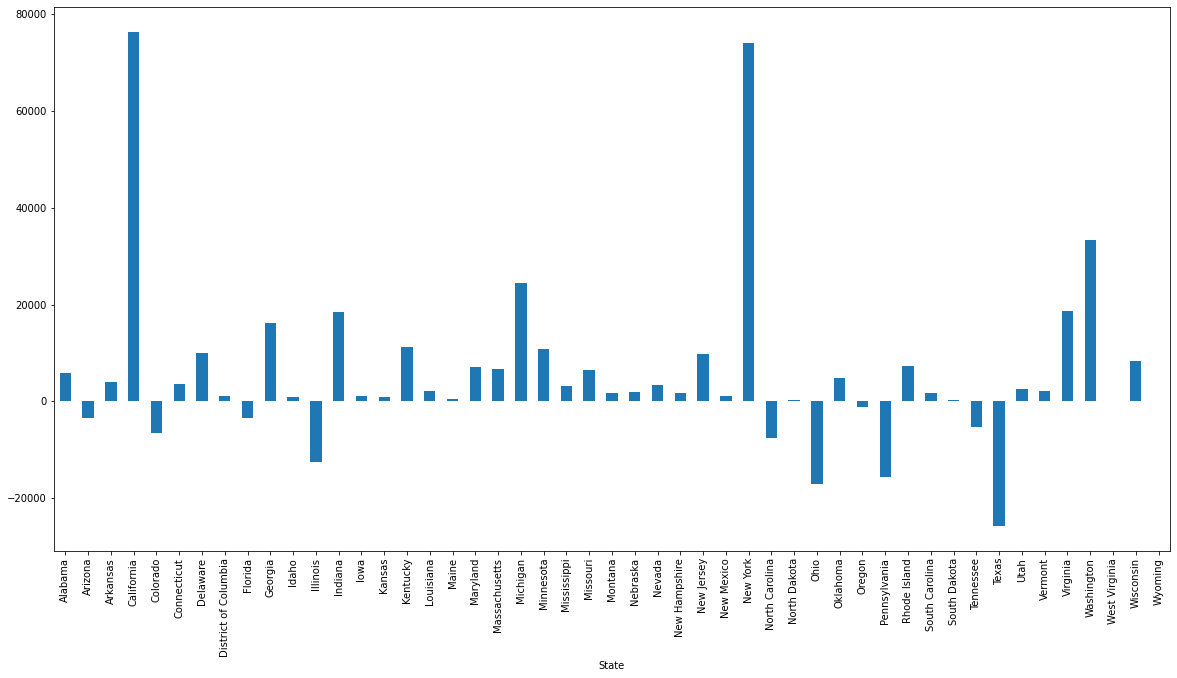

In [70]:
plt.figure(figsize=(20,10))
data_group=df.groupby(["State"])["Profit"].sum()
data_group.sort_values(ascending=False)
data_group.plot.bar()
plt.xticks(rotation=90)
plt.show()

####**Comparision of profit respective to sales**

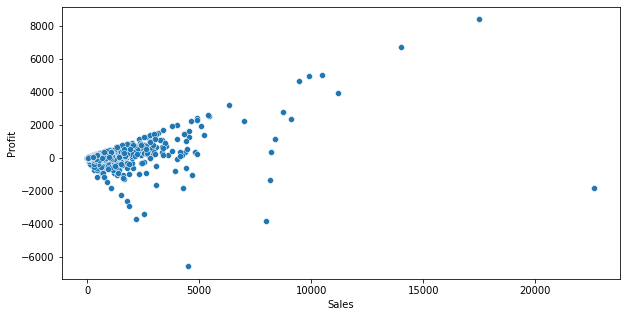

In [71]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df, x="Sales", y="Profit")
plt.show()

###**Pairplot**

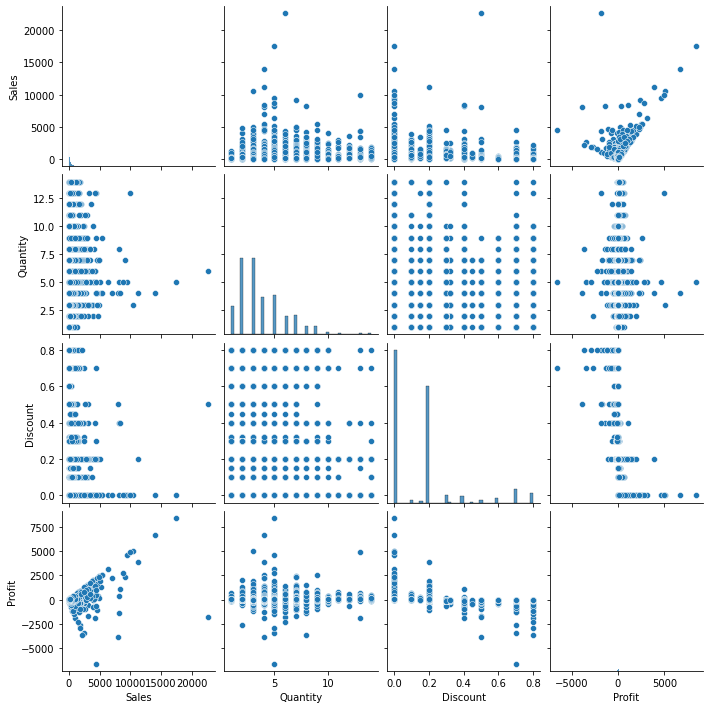

In [72]:
sb.pairplot(df)
plt.show()

##**Check the correlation between numeric data**

In [73]:
cor_matrix=df.corr()

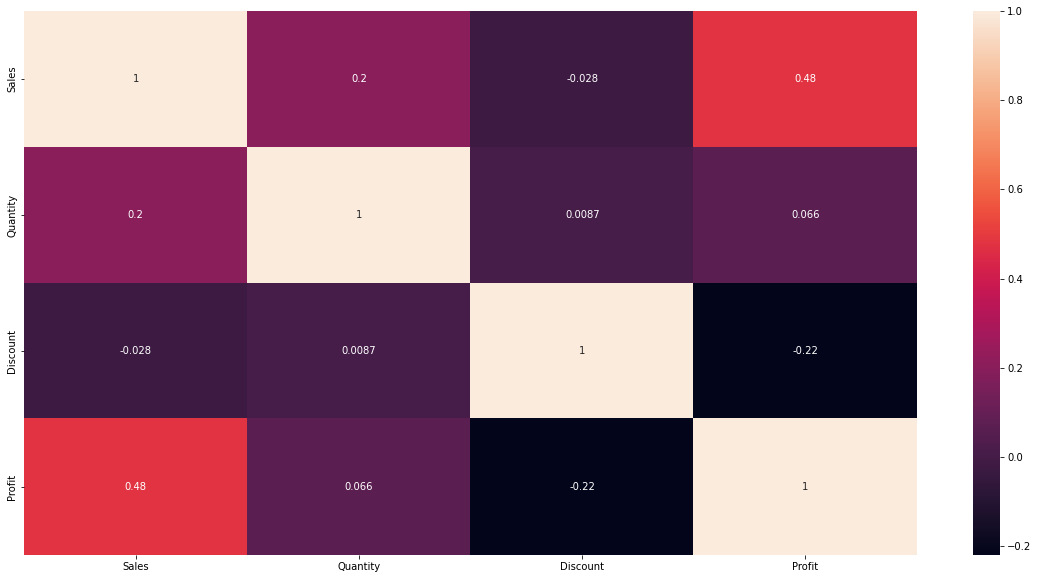

In [74]:
plt.figure(figsize=(20,10))
sb.heatmap(cor_matrix,annot=True)
plt.show()



---


##**Analysis Outcome**

* Discount is not that affecting on profit hence it should be taken care of.
 Increasing it may affect the profit.
* We should be more careful about the central region as it indicates least profit.
* With the help of heap map we can see the correlaton between sales and profit.